In [1]:
% matplotlib inline
from metro import io
from metro import utility
from metro import assignment
from metro import multiplex as mx
import networkx as nx
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats.mstats import tmean
import matplotlib.pyplot as plt


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
df = pd.read_csv('3_throughput/route_info_100.csv')

In [3]:
google = pd.read_table('1_data/google_times.txt', sep = '\t')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2868: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
m = mx.read_multi(nodes_file_name = '3_throughput/mx_flow_nodes.txt', 
                  edges_file_name = '3_throughput/mx_flow_edges.txt')

In [5]:
google_map = {int(m.G.node[n]['con_name']) : int(m.G.node[n]['google_name']) for n in m.G.node if m.G.node[n]['layer'] == 'taz'}

In [6]:
df['o_google'] = df['o_con'].map(google_map.get)
df['d_google'] = df['d_con'].map(google_map.get)

In [7]:
comp = df.merge(google, how = 'inner', left_on=['o_google', 'd_google'], right_on = ['Origin', 'Destination'])

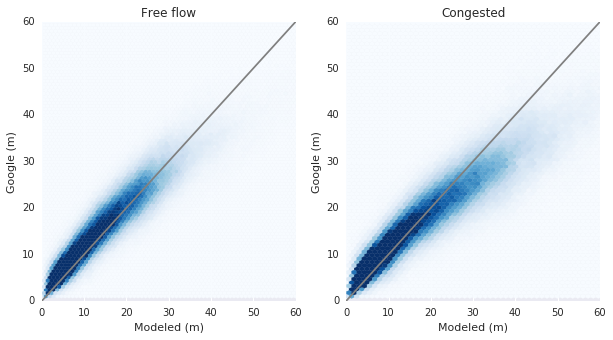

In [8]:
vmax = 2000

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(121)
ax.hexbin(comp['free_flow_time_m'], comp['Free Flow (s)'] / 60.0, cmap = 'Blues', vmax = vmax)
ax.plot([0,60], [0,60], color = 'grey')
ax.set(xlim = (0,60), ylim = (0,60), xlabel = 'Modeled (m)', ylabel = 'Google (m)', title = 'Free flow')

ax = fig.add_subplot(122)
ax.hexbin(comp['congested_time_m'], comp['Expected (s)'] / 60.0, cmap = 'Blues', vmax = vmax)
ax.plot([0,60], [0,60], color = 'grey')
ax.set(xlim = (0,60), ylim = (0,60), xlabel = 'Modeled (m)', ylabel = 'Google (m)', title = 'Congested')
plt.savefig('4_figs/validation.png')

In [9]:
def compare(col1, col2):

    trim = .05

    data = comp[[col1, col2]]
    data = data[~np.isnan(data[col1])]
    data = data[~np.isnan(data[col2])]

    x = data[col1]
    y = data[col2]

    t1 = tmean(y, limits = (y.quantile(trim), y.quantile(1-trim)))
    t2 = tmean(x, limits = (x.quantile(trim), x.quantile(1-trim)))
    t3 = t1 / t2
    
    return t3

In [10]:
compare('free_flow_time_m', 'Free Flow (s)') / 60.0 # should be close to 1

1.0678851195386465

In [11]:
compare('congested_time_m', 'Expected (s)') / 60.0 # should also be close to 1

0.93576564648601301